# The ``together`` Argument

By default, JAVELIN will fit each line to the continuum separately. However, in some cases, analysis requires that each line be fit to the continuum together, with the same model. JAVELIN uses this setting by default, which has been implemented in pyPetal with the ``together`` argument for the JAVELIN module.

If ``together=True``, JAVELIN will fit all light curves to the same model. In this case, there will be a directory labeled ``javelin`` in ``output_dir``, containing all of the diagnostic files and figures.

If ``together=False``, each line will be fit to the continuum separately. In this case, there will be a directory labeled ``javelin`` in the subdirectory for each line. This directory will then contain all of the diagnostic files and figures for that line.

We've already seen ``together=False`` in the first example, so now we'll set ``together=True``:

In [1]:
import pypetal.pipeline as pl

main_dir = 'pypetal/examples/dat/javelin_'
filenames = [ main_dir + 'continuum.dat', main_dir + 'yelm.dat', main_dir + 'zing.dat' ]

output_dir = 'javelin_output2/'
line_names = ['continuum', 'line1', 'line2']


Running JAVELIN
--------------------
rm_type: spec
lagtobaseline: 0.3
laglimit: [[-1976.98849, 1976.98849], [-1976.98849, 1976.98849]]
fixed: False
p_fix: False
subtract_mean: True
nwalker: 50
nburn: 50
nchain: 100
output_chains: True
output_burn: True
output_logp: True
nbin: 50
metric: med
together: True
--------------------
        
start burn-in
nburn: 50 nwalkers: 50 --> number of burn-in iterations: 2500
burn-in finished
save burn-in chains to /home/stone28/projects/petl_mock/test_repo/javelin_output2/javelin/burn_cont.txt
start sampling
sampling finished
acceptance fractions for all walkers are
0.67 0.73 0.62 0.67 0.68 0.66 0.66 0.67 0.69 0.78 0.75 0.65 0.71 0.67 0.66 0.73 0.73 0.76 0.65 0.73 0.72 0.78 0.65 0.72 0.66 0.68 0.65 0.66 0.64 0.66 0.78 0.74 0.66 0.75 0.67 0.70 0.74 0.71 0.77 0.63 0.78 0.59 0.65 0.60 0.75 0.73 0.76 0.71 0.62 0.55
save MCMC chains to /home/stone28/projects/petl_mock/test_repo/javelin_output2/javelin/chain_cont.txt
save logp of MCMC chains to /home/stone

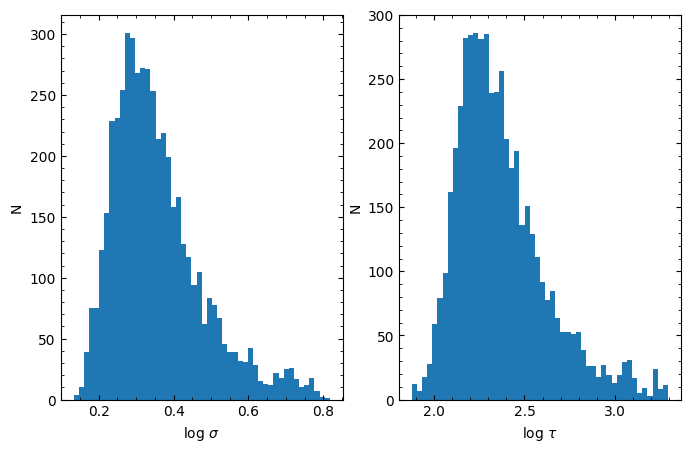

run single chain without subdividing matrix 
start burn-in
using priors on sigma and tau from continuum fitting
[[  1.771 140.202]
 [  2.15  211.188]
 [  2.947 398.938]]
penalize lags longer than 0.30 of the baseline
no penalizing long widths, but within the baseline
nburn: 50 nwalkers: 50 --> number of burn-in iterations: 2500
burn-in finished
save burn-in chains to /home/stone28/projects/petl_mock/test_repo/javelin_output2/javelin/burn_rmap.txt
start sampling
sampling finished
acceptance fractions are
0.05 0.02 0.00 0.03 0.02 0.01 0.02 0.05 0.02 0.09 0.03 0.03 0.04 0.02 0.02 0.03 0.04 0.02 0.01 0.07 0.06 0.01 0.03 0.02 0.01 0.03 0.02 0.01 0.03 0.01 0.04 0.00 0.07 0.02 0.02 0.02 0.03 0.03 0.04 0.07 0.01 0.03 0.00 0.01 0.06 0.00 0.07 0.02 0.00 0.04
save MCMC chains to /home/stone28/projects/petl_mock/test_repo/javelin_output2/javelin/chain_rmap.txt
save logp of MCMC chains to /home/stone28/projects/petl_mock/test_repo/javelin_output2/javelin/logp_rmap.txt
HPD of sigma
low:    1.933 med

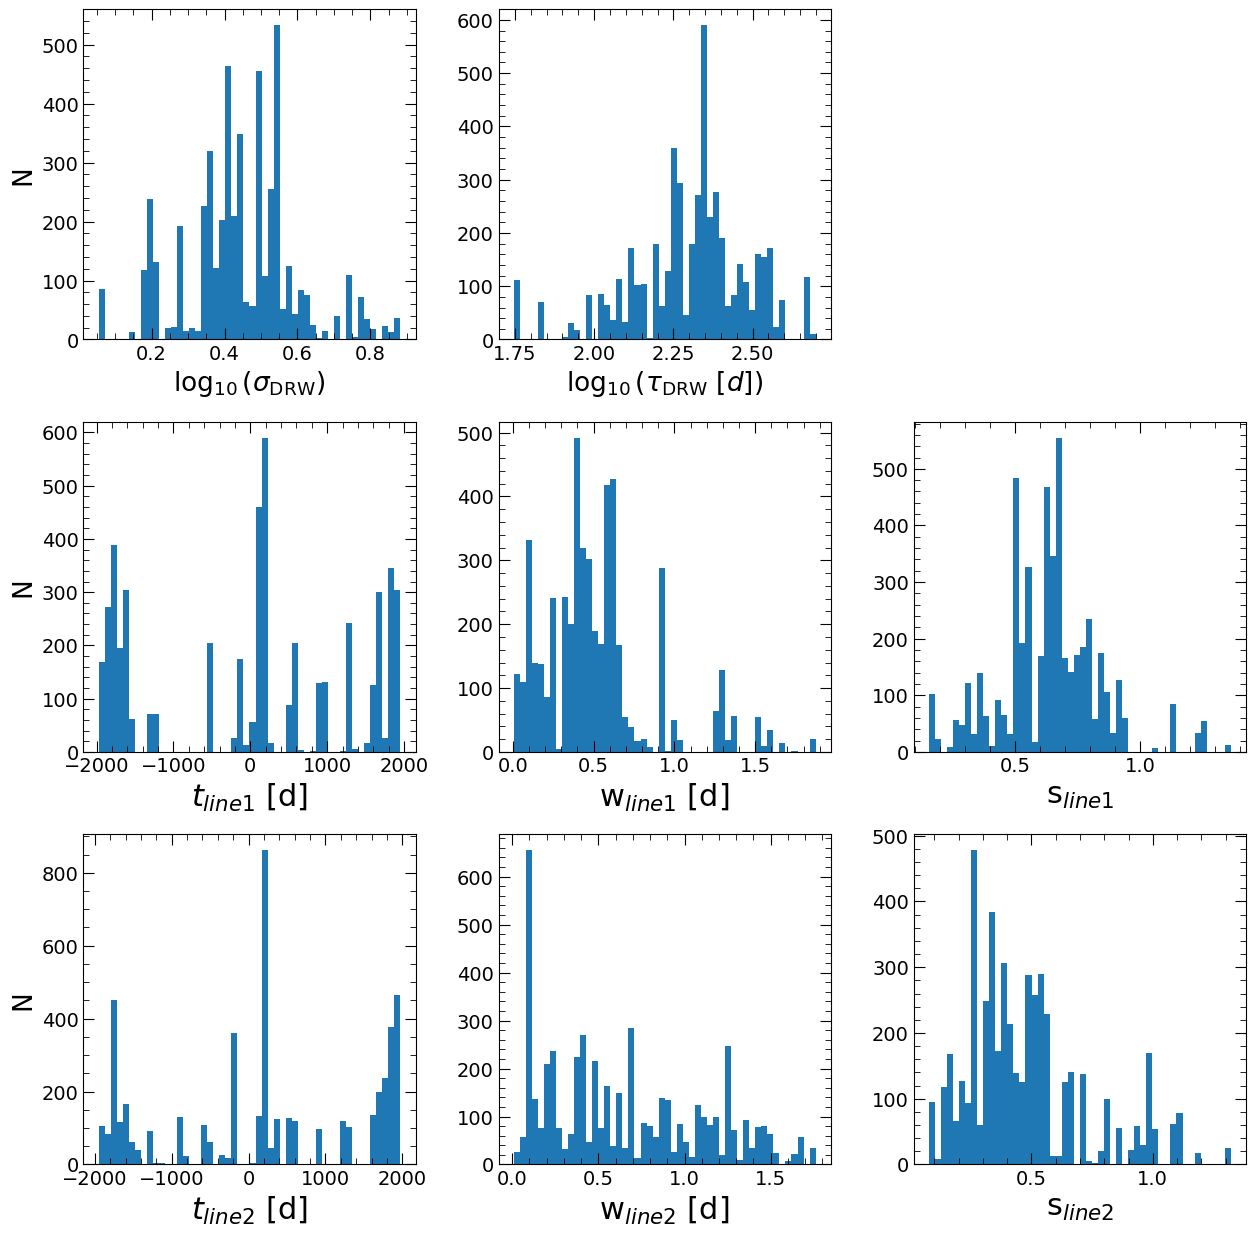

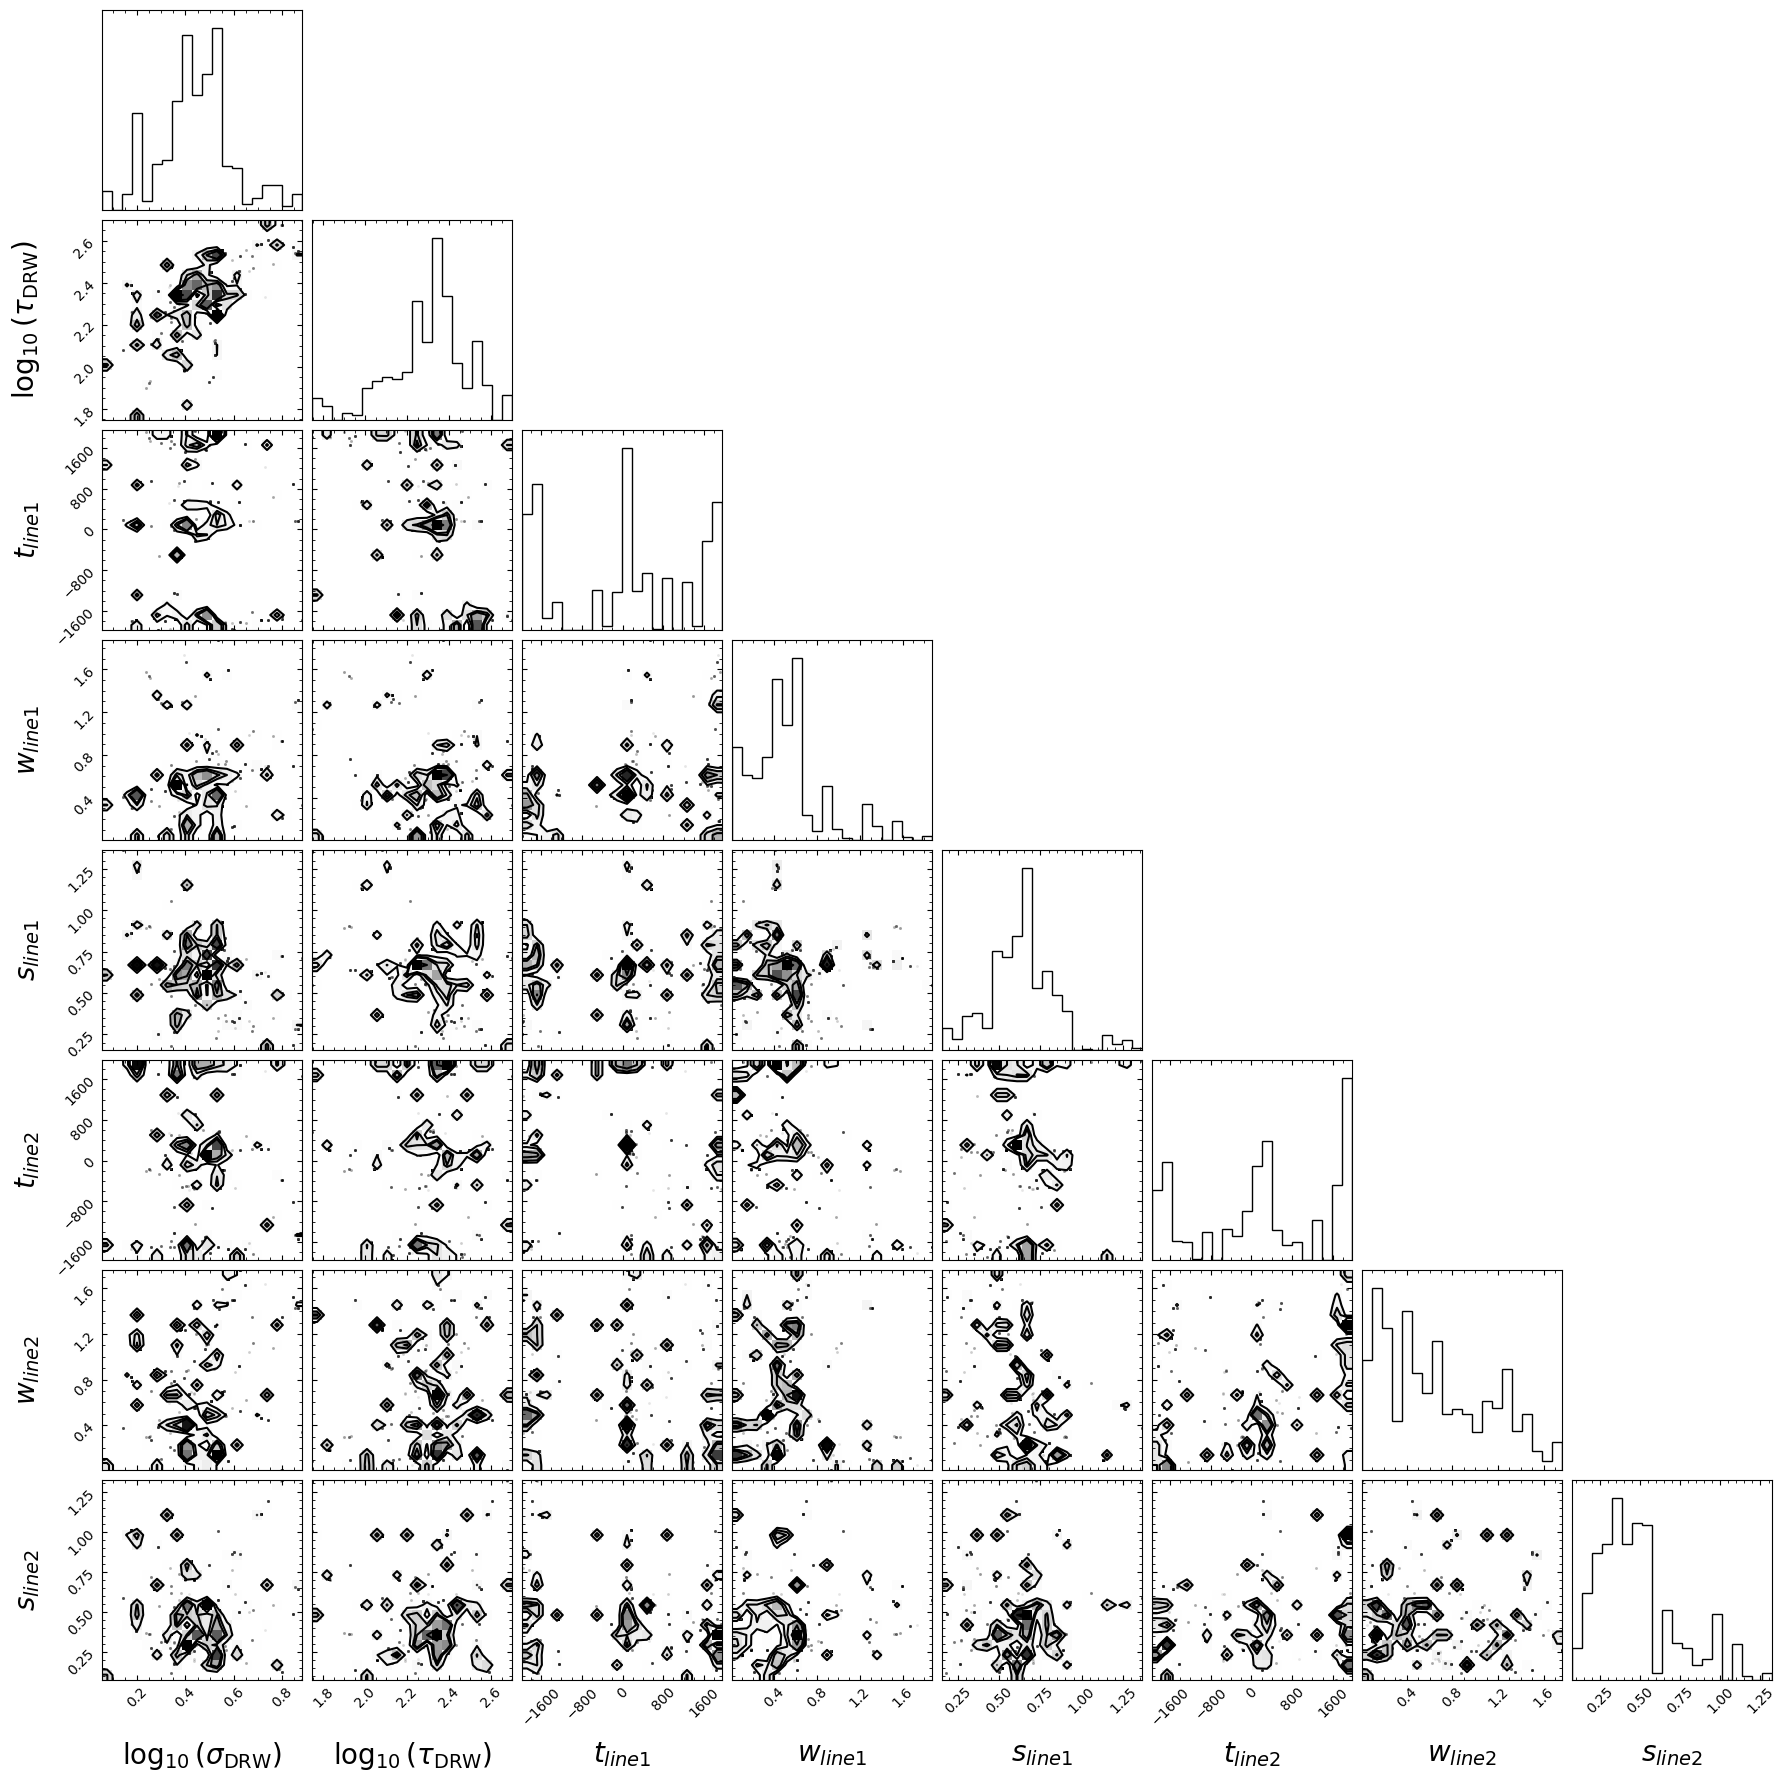

covariance matrix calculated
covariance matrix decomposed and updated by U


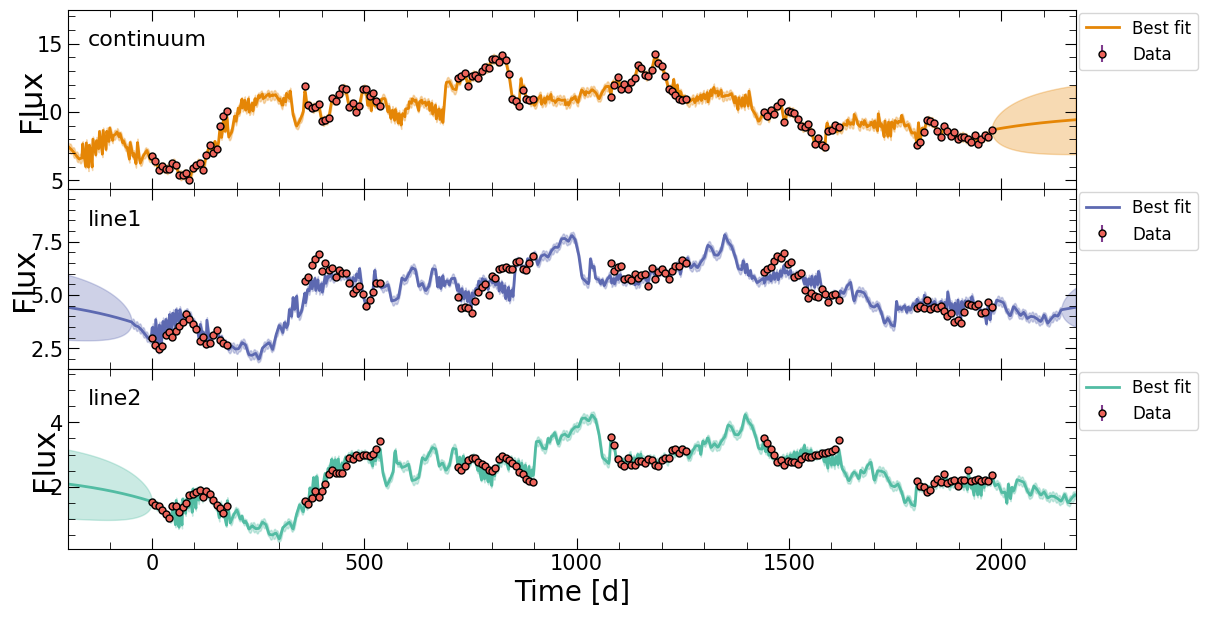

In [2]:
params = {
    'nwalker': 50,
    'nburn': 50,
    'nchain': 100,
    'together': True
}

res = pl.run_pipeline( output_dir, filenames,line_names,
                 run_javelin=True,
                 javelin_params=params,
                 verbose=True,
                 plot=True,
                 file_fmt='ascii')

In this case, ``javelin_res`` in the output dictionary will have only one dict, containing the group fit:

In [4]:
res['javelin_res']

{'cont_hpd': array([[0.571, 4.943],
        [0.766, 5.353],
        [1.081, 5.989]]),
 'tau': array([183.711, 266.706, 209.341, ..., 234.023, 170.3  , 283.809]),
 'sigma': array([1.947, 2.709, 2.322, ..., 4.236, 3.377, 3.21 ]),
 'tophat_params': array([[-5.228e+02,  1.273e+03,  1.703e+02, ...,  9.740e+01,  1.813e+03,
         -1.860e+03],
        [ 3.199e-01,  3.361e-01,  6.209e-01, ...,  6.487e-01,  5.759e-02,
          4.761e-01],
        [ 5.852e-01,  7.990e-01,  3.197e-01, ...,  5.139e-01,  5.087e-01,
          7.426e-01],
        [-2.683e+02, -5.237e+02,  3.483e+02, ...,  1.887e+03,  1.262e+03,
          1.899e+02],
        [ 4.450e-01,  2.428e-01,  4.053e-01, ...,  1.761e+00,  9.649e-02,
          6.089e-01],
        [ 5.390e-01,  5.025e-01,  3.941e-01, ...,  2.652e-01,  3.324e-01,
          5.128e-01]]),
 'hpd': array([[ 6.589e-01,  4.893e+00, -1.740e+03,  1.808e-01,  4.972e-01,
         -1.616e+03,  1.438e-01,  2.566e-01],
        [ 1.009e+00,  5.373e+00,  1.641e+02,  4.761e-01

However, the ``tophat_params`` key will now be of length $2 + 3 \cdot ({\rm number \ of \ lines})$ in the order:
$[ \log(\sigma_{\rm DRW}), \log(\tau_{\rm DRW}), t_{\rm line1}, w_{\rm line1}, s_{\rm line1}, t_{line2}, ... ]$


The output directory will be:

```
javelin_output2/
├── continuum
├── line1
├── line2
├── javelin/
│   ├── burn_cont.txt
│   ├── burn_rmap.txt
│   ├── logp_cont.txt
│   ├── logp_rmap.txt
│   ├── chain_cont.txt
│   ├── chain_rmap.txt
│   ├── continuum_lc_fits.dat
│   ├── line1_lc_fits.dat
│   ├── line2_lc_fits.dat
│   ├── cont_lcfile.dat
│   ├── tot_lcfile.dat
│   ├── javelin_histogram.pdf
│   ├── javelin_corner.pdf
│   └── javelin_bestfit.pdf
└── light_curves
```